# Data Analysis using python Task-2

## Project 1: General Exploratory Data Analysis (EDA)

## import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [5]:
df=pd.read_csv("D:/global_superstore.csv")

## Basic Info

In [6]:
df.head()

,Order ID,Order Date,Region,Product Category,Sales,Profit
0,ORD1000,2022-06-25,Central,Furniture,10000.00,-87.33
1,ORD1001,2022-07-29,South,Furniture,829.41,-1000.00
2,ORD1002,2022-07-25,East,Technology,668.91,43.90
3,ORD1003,2022-07-16,Central,Office Supplies,246.35,225.41
4,ORD1004,2022-07-16,Central,Office Supplies,310.26,-156.06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          303 non-null    object 
 1   Order Date        303 non-null    object 
 2   Region            303 non-null    object 
 3   Product Category  303 non-null    object 
 4   Sales             298 non-null    float64
 5   Profit            298 non-null    float64
dtypes: float64(2), object(4)
memory usage: 14.3+ KB


In [8]:
print("Shape of the dataset:",df.shape)
print("\n Datatypes:",df.dtypes)
print("\n Missing Values:",df.isnull().sum())
print("\n Summary Statistics:",df.describe())

Shape of the dataset: (303, 6)

 Datatypes: Order ID             object
Order Date           object
Region               object
Product Category     object
Sales               float64
Profit              float64
dtype: object

 Missing Values: Order ID            0
Order Date          0
Region              0
Product Category    0
Sales               5
Profit              5
dtype: int64

 Summary Statistics:               Sales       Profit
count    298.000000   298.000000
mean     556.340839    58.002315
std      608.609567   151.440672
min       52.470000 -1000.000000
25%      303.290000   -55.275000
50%      536.865000    67.375000
75%      748.752500   183.587500
max    10000.000000   298.850000


## Remove duplicates

In [9]:
df.drop_duplicates()

,Order ID,Order Date,Region,Product Category,Sales,Profit
0,ORD1000,2022-06-25,Central,Furniture,10000.00,-87.33
1,ORD1001,2022-07-29,South,Furniture,829.41,-1000.00
2,ORD1002,2022-07-25,East,Technology,668.91,43.90
3,ORD1003,2022-07-16,Central,Office Supplies,246.35,225.41
4,ORD1004,2022-07-16,Central,Office Supplies,310.26,-156.06
...,...,...,...,...,...,...
297,ORD1297,2022-10-14,Central,Technology,363.83,185.49
298,ORD1298,2022-12-03,East,Technology,937.01,-165.88
299,ORD1299,2022-08-06,South,Furniture,57.16,218.54
300,ORD1000,2022-06-25,Central,Furniture,644.64,-87.33


## Handling missing values

In [22]:
df["Sales"] = df["Sales"].fillna(df["Sales"].median())
df["Profit"] = df["Profit"].fillna(df["Profit"].median())

## Detect and handle outliers using IQR

In [48]:
Q1 = df[["Sales", "Profit"]].quantile(0.25)
Q3 = df[["Sales", "Profit"]].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[["Sales", "Profit"]] < (Q1 - 1.5 * IQR)) | (df[["Sales", "Profit"]] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Updated shape after cleaning

In [21]:
print("Shape after cleaning:", df.shape)

Shape after cleaning: (301, 6)


## Statistical Measures

In [23]:
print("\nMean Sales:", df["Sales"].mean())
print("Mean Profit:", df["Profit"].mean())
print("Sales-Region Correlation:\n", df.corr(numeric_only=True))


Mean Sales: 523.735830564784
Mean Profit: 62.15579734219269
Sales-Region Correlation:
            Sales    Profit
Sales   1.000000  0.029685
Profit  0.029685  1.000000


## Visualizations

## Histogram for Sales

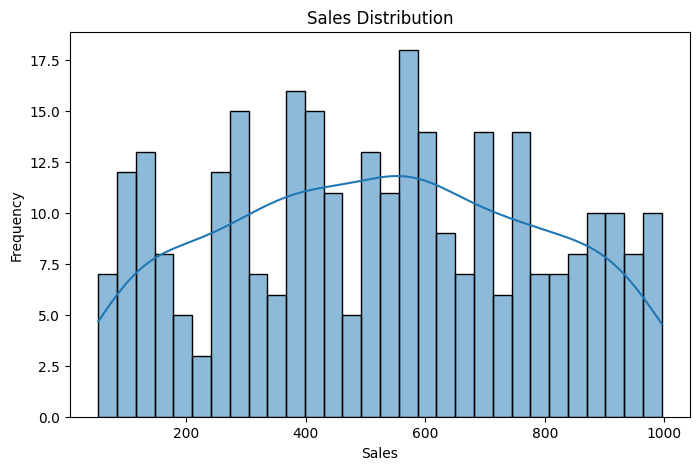

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

## Histogram for Profit

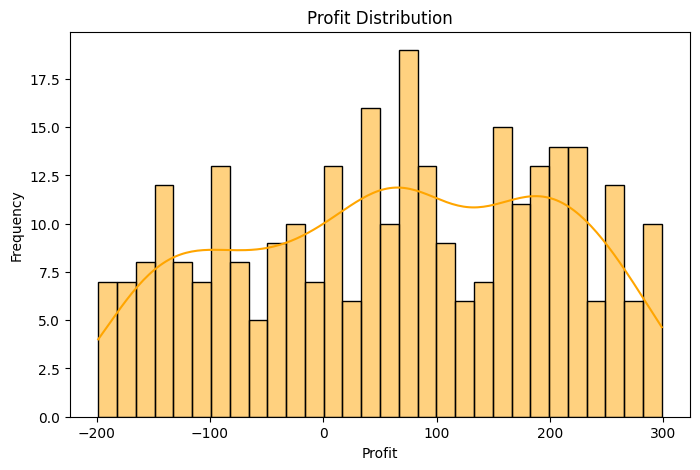

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Profit"], bins=30, kde=True, color='orange')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

## Boxplots

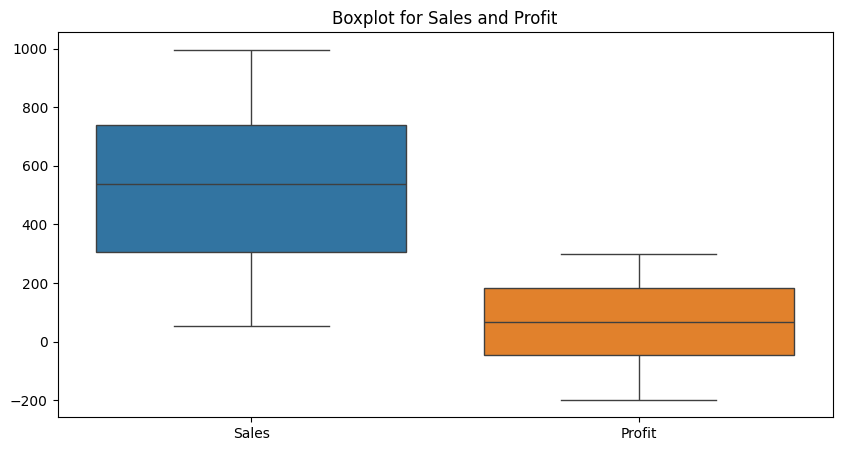

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["Sales", "Profit"]])
plt.title("Boxplot for Sales and Profit")
plt.show()

## Heatmap for correlation

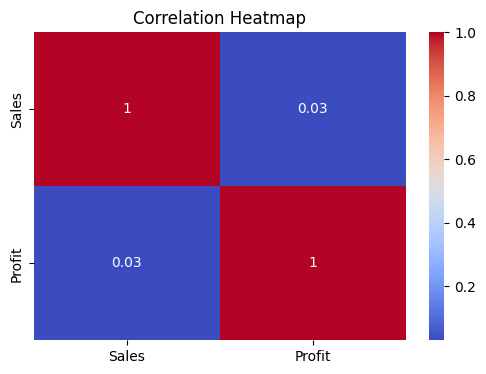

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Project 2: Sales Performance Analysis

## Since we have already imported necessary libraries above so it is not required to import every library from above we can import apart from that

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Load dataset

In [28]:
df=pd.read_csv("D:/sales_performance.csv")

## Basic Info

In [29]:
df.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,Central,15000.00,-316.98,0.40,Furniture,2023-08-13
1,Table,East,1342.74,-2000.00,0.33,Furniture,2023-02-09
2,Laptop,West,773.05,220.01,0.05,Office Supplies,2023-08-18
3,Notebook,Central,1098.46,-82.01,0.30,Furniture,2023-11-01
4,Notebook,West,1015.11,-411.16,0.27,Office Supplies,2023-02-11


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   302 non-null    object 
 1   Region    302 non-null    object 
 2   Sales     302 non-null    float64
 3   Profit    302 non-null    float64
 4   Discount  297 non-null    float64
 5   Category  302 non-null    object 
 6   Date      302 non-null    object 
dtypes: float64(3), object(4)
memory usage: 16.6+ KB


In [32]:
df.shape

(302, 7)

In [33]:
df.isnull().sum()

Product     0
Region      0
Sales       0
Profit      0
Discount    5
Category    0
Date        0
dtype: int64

## Data Cleaning

In [34]:
df.drop_duplicates()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,Central,15000.00,-316.98,0.40,Furniture,2023-08-13
1,Table,East,1342.74,-2000.00,0.33,Furniture,2023-02-09
2,Laptop,West,773.05,220.01,0.05,Office Supplies,2023-08-18
3,Notebook,Central,1098.46,-82.01,0.30,Furniture,2023-11-01
4,Notebook,West,1015.11,-411.16,0.27,Office Supplies,2023-02-11
...,...,...,...,...,...,...,...
297,Chair,Central,686.53,371.60,0.07,Furniture,2023-05-15
298,Table,East,1899.37,-243.31,0.13,Technology,2023-11-24
299,Laptop,South,1937.98,165.29,0.44,Office Supplies,2023-09-02
300,Laptop,Central,869.12,-316.98,0.40,Furniture,2023-08-13


## EDA
## 1.Sales trends over time 

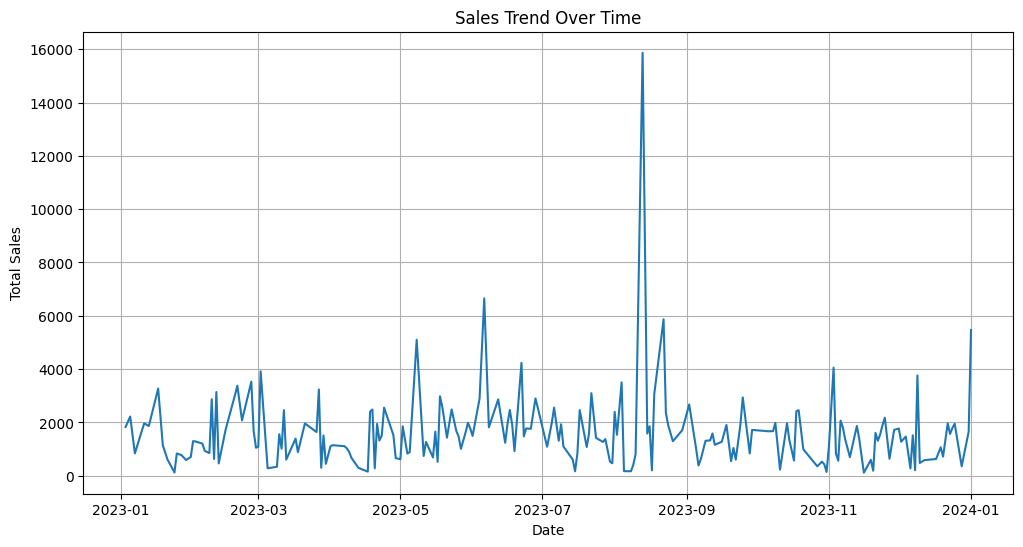

In [39]:
sales_by_date = df.groupby("Date")["Sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_date, x="Date", y="Sales")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## 2. Profit vs. Discount (Scatter Plot)

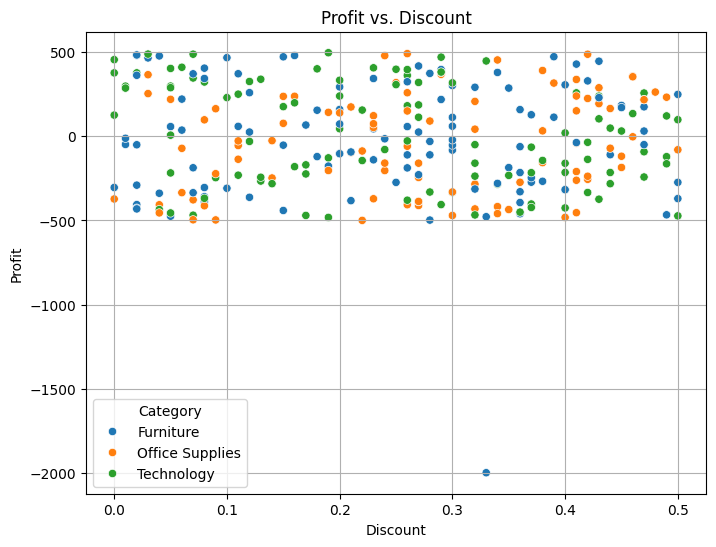

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category")
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

## 3. Sales by Region (Bar Chart)

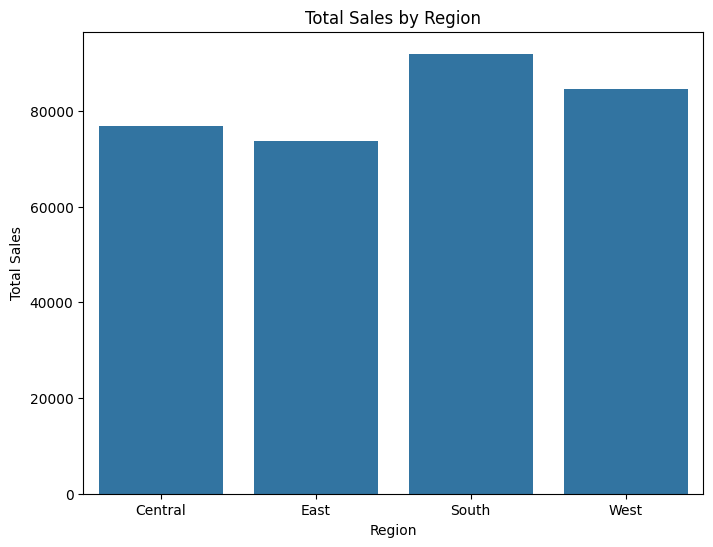

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(data=df.groupby("Region")["Sales"].sum().reset_index(), x="Region", y="Sales")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()

## 4. Sales by Category (Pie Chart)

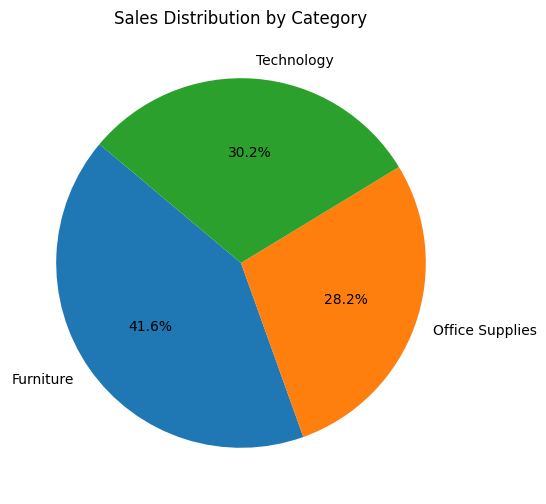

In [42]:
sales_by_cat = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(6,6))
sales_by_cat.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

# Predictive Modeling: Linear Regression
## Feature selection

In [43]:
X = df[["Profit", "Discount"]]
y = df["Sales"]

## Train-test split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict

In [46]:
y_pred = model.predict(X_test)

## Evaluate Model

In [47]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("\n--- Linear Regression Model ---")
print("R² Score:", round(r2, 4))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


--- Linear Regression Model ---
R² Score: -0.0989
Mean Squared Error (MSE): 314480.3
Model Coefficients: [-2.81232284e-01  3.48757639e+02]
Model Intercept: 1008.2288002468567
